In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Access the stored PPV1 value
%store -r PPV1
%store -r PPV2

### Calculate true DNA

In [23]:
# Import future appointments data
historic = pd.read_csv("../historic_first_pred_ENT.csv")

In [24]:
# Transform date from object to datetime
historic["appt_date"] = pd.to_datetime(historic["appt_date"]).dt.date
historic

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,prediction_type,case_control,use_case,appt_date,appt_month_trans,hospital_service_display_trans,service_mapping_trans,reason_display_trans,appointment_type_trans,did_not_attend_risk_group_trans
0,12088942,42,27.45,NaN,0,0,0,4,0,1,...,First prediction,1.0,3,2024-02-14,2.0,3,10,6,0,3
1,12207851,42,27.45,NaN,1,0,1,4,0,0,...,First prediction,1.0,3,2024-03-12,3.0,3,10,6,0,4
2,12791383,27,21.70,NaN,0,0,0,3,0,0,...,First prediction,1.0,3,2024-01-31,1.0,3,10,6,0,2
3,12940266,42,27.45,NaN,1,0,0,2,0,0,...,First prediction,1.0,3,2024-04-03,4.0,3,10,6,0,1
4,13428133,83,21.70,NaN,0,0,0,2,0,0,...,First prediction,1.0,3,2024-04-05,4.0,3,10,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790,20238919,42,21.70,NaN,0,0,0,2,0,1,...,First prediction,1.0,3,2024-04-23,4.0,111,9,9,0,1
5791,11138651,47,27.45,NaN,0,0,0,2,0,0,...,First prediction,1.0,3,2024-02-20,2.0,3,10,6,0,3
5792,12468296,52,27.45,NaN,0,0,0,1,0,1,...,First prediction,1.0,3,2023-11-25,11.0,3,10,6,0,3
5793,12799747,72,21.70,NaN,0,0,0,2,0,1,...,First prediction,1.0,3,2023-12-08,12.0,111,9,6,0,2


In [25]:
# Filter for very high risk group
historic_very_high = historic[historic["did_not_attend_risk_group_trans"] == 4]

In [26]:
# Calculate reality (true DNA time) in very high risk group
true_dna = historic[(historic["no_show"] == 1)]
true_dna

# Sum up true DNA time per day
true_dna_time = true_dna.groupby("appt_date")["appt_duration"].sum().reset_index()
true_dna_time

,appt_date,appt_duration
0,2023-11-24,105.0
1,2023-11-25,135.0
2,2023-11-26,60.0
3,2023-11-27,70.0
4,2023-11-28,135.0
...,...,...
115,2024-04-19,45.0
116,2024-04-22,95.0
117,2024-04-23,105.0
118,2024-05-17,15.0


In [27]:
# Group true DNA by month for inspection
print(true_dna.groupby("appt_month_trans")["appt_duration"].sum().reset_index())
print(true_dna.groupby("appt_month_trans").size())
historic.groupby("appt_month_trans").size()

   appt_month_trans  appt_duration
0               1.0         3675.0
1               2.0         2640.0
2               3.0         2540.0
3               4.0         1505.0
4               5.0           15.0
5               7.0           15.0
6              11.0          650.0
7              12.0         2530.0
appt_month_trans
1.0     198
2.0     168
3.0     138
4.0      89
5.0       1
7.0       1
11.0     36
12.0    130
dtype: int64


appt_month_trans
1.0     1269
2.0     1261
3.0     1315
4.0      935
5.0        1
7.0        1
11.0     232
12.0     781
dtype: int64

### Historic data: compare the two methods

#### Scenario 1: sum the total duration per day

In [28]:
# Sum up appointment duration per day
dna_time = historic_very_high.groupby("appt_date")["appt_duration"].sum().reset_index()
dna_time

,appt_date,appt_duration
0,2023-11-25,15.0
1,2023-11-26,45.0
2,2023-11-27,15.0
3,2023-11-28,15.0
4,2023-11-30,15.0
...,...,...
67,2024-04-16,20.0
68,2024-04-17,15.0
69,2024-04-19,15.0
70,2024-04-22,15.0


In [29]:
# Multiply by PPV1 for a more accurate estimate
dna_time["appt_duration_est"] = dna_time["appt_duration"] * PPV1
dna_time

,appt_date,appt_duration,appt_duration_est
0,2023-11-25,15.0,8.804348
1,2023-11-26,45.0,26.413043
2,2023-11-27,15.0,8.804348
3,2023-11-28,15.0,8.804348
4,2023-11-30,15.0,8.804348
...,...,...,...
67,2024-04-16,20.0,11.739130
68,2024-04-17,15.0,8.804348
69,2024-04-19,15.0,8.804348
70,2024-04-22,15.0,8.804348


In [30]:
### Testing with PPV 2 (very high + high )

# Filter for very high risk group
historic_high_very_high = historic[(historic["did_not_attend_risk_group_trans"] == 4) | (historic["did_not_attend_risk_group_trans"] == 3)]
dna_time2 = historic_high_very_high.groupby("appt_date")["appt_duration"].sum().reset_index()
dna_time2["appt_duration_est"] = dna_time2["appt_duration"] * PPV2
dna_time2

,appt_date,appt_duration,appt_duration_est
0,2023-11-24,50.0,13.759124
1,2023-11-25,275.0,75.675182
2,2023-11-26,90.0,24.766423
3,2023-11-27,90.0,24.766423
4,2023-11-28,165.0,45.405109
...,...,...,...
122,2024-04-19,135.0,37.149635
123,2024-04-22,235.0,64.667883
124,2024-04-23,340.0,93.562044
125,2024-04-24,150.0,41.277372


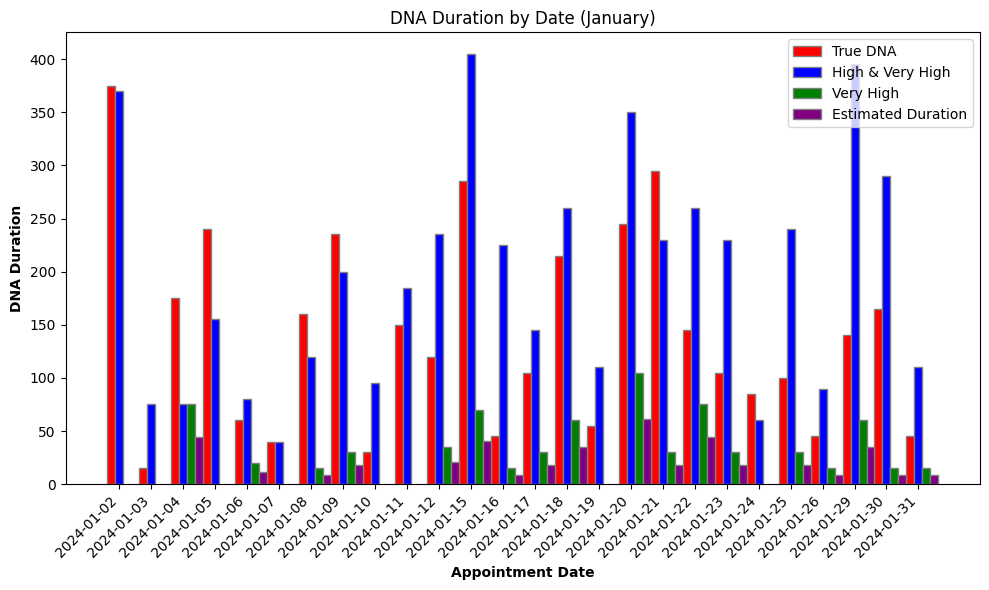

In [31]:
# Filter and group the data
true_dna_grouped = true_dna[true_dna["appt_month_trans"] == 1].groupby("appt_date")["appt_duration"].sum().reset_index()
historic_high_very_high_grouped = historic_high_very_high[historic_high_very_high["appt_month_trans"] == 1].groupby("appt_date")["appt_duration"].sum().reset_index()
historic_very_high_grouped = historic_very_high[historic_very_high["appt_month_trans"] == 1].groupby("appt_date")["appt_duration"].sum().reset_index()
historic_very_high_grouped = historic_very_high[historic_very_high["appt_month_trans"] == 1].groupby("appt_date")["appt_duration"].sum().reset_index()


# Merge the data into a single DataFrame
scenario1_df = pd.merge(true_dna_grouped, historic_high_very_high_grouped, on='appt_date', how='outer', suffixes=('_true_dna', '_high_very_high'))
scenario1_df = pd.merge(scenario1_df, historic_very_high_grouped, on='appt_date', how='outer')
scenario1_df.rename(columns={'appt_duration': 'appt_duration_very_high'}, inplace=True)

# Calculate the estimated duration
scenario1_df['appt_duration_very_high_proportion'] = scenario1_df['appt_duration_very_high'] * PPV1

# Plot the data
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Set positions of the bars
r1 = range(len(scenario1_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bars
plt.bar(r1, scenario1_df['appt_duration_true_dna'], color='red', width=bar_width, edgecolor='grey', label='True DNA')
plt.bar(r2, scenario1_df['appt_duration_high_very_high'], color='blue', width=bar_width, edgecolor='grey', label='High & Very High')
plt.bar(r3, scenario1_df['appt_duration_very_high'], color='green', width=bar_width, edgecolor='grey', label='Very High')
plt.bar(r4, scenario1_df['appt_duration_very_high_proportion'], color='purple', width=bar_width, edgecolor='grey', label='Estimated Duration')

# Add labels and title
plt.xlabel('Appointment Date', fontweight='bold')
plt.ylabel('DNA Duration', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(scenario1_df))], scenario1_df['appt_date'])
plt.title('DNA Duration by Date (January)')

# Add legend
plt.legend()

# Adjust x-axis date labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
# Compare estimated DNA to true DNA time using MAE, MSE, and RMSE
scenario1_df["error"] = scenario1_df["appt_duration_true_dna"] - scenario1_df["appt_duration_very_high"]
scenario1_df["error2"] = scenario1_df["appt_duration_true_dna"] - scenario1_df["appt_duration_very_high_proportion"]

# Compute Mean Absolute Error (MAE)
mae_scenario1 = scenario1_df["error"].abs().mean()
mae_scenario1_2 = scenario1_df["error2"].abs().mean()

# Compute Mean Squared Error (MSE)
mse_scenario1 = (scenario1_df["error"] ** 2).mean()
mse_scenario1_2 = (scenario1_df["error2"] ** 2).mean()

# Compute Root Mean Squared Error (RMSE)
rmse_scenario1 = np.sqrt(mse_scenario1)
rmse_scenario1_2 = np.sqrt(mse_scenario1)

#### Scenario 2: proportion of duration based on DNA probability

In [33]:
# Get duration based on proportion of DNA probability
historic_very_high["proportion_duration"] = historic_very_high["did_not_attend_risk"] * historic_very_high["appt_duration"]
historic_very_high

/var/folders/0t/dc47jt692_qc1qb7bqkgylhw0000gn/T/ipykernel_33962/2203713024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_very_high["proportion_duration"] = historic_very_high["did_not_attend_risk"] * historic_very_high["appt_duration"]


,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,case_control,use_case,appt_date,appt_month_trans,hospital_service_display_trans,service_mapping_trans,reason_display_trans,appointment_type_trans,did_not_attend_risk_group_trans,proportion_duration
1,12207851,42,27.45,NaN,1,0,1,4,0,0,...,1.0,3,2024-03-12,3.0,3,10,6,0,4,10.916141
15,14735077,27,27.45,NaN,0,0,1,3,0,0,...,1.0,3,2023-11-27,11.0,3,10,6,0,4,7.333176
79,16140041,22,27.45,NaN,0,0,1,1,1,0,...,1.0,3,2024-01-18,1.0,3,10,6,0,4,9.007040
82,16154048,27,21.70,NaN,0,0,0,4,0,1,...,1.0,3,2023-11-30,11.0,3,10,6,0,4,8.382911
83,16159722,27,39.45,NaN,1,0,0,2,0,0,...,1.0,3,2024-04-23,4.0,3,10,6,0,4,8.425598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,19937856,2,27.45,NaN,0,1,1,2,0,0,...,1.0,3,2024-03-22,3.0,3,10,4,0,4,7.562602
5324,19939077,42,27.45,NaN,1,0,0,1,0,0,...,1.0,3,2024-03-16,3.0,3,10,8,0,4,7.156025
5661,20090502,17,39.45,NaN,1,0,0,1,0,0,...,1.0,3,2024-04-16,4.0,3,10,4,0,4,10.641456
5682,20111067,42,18.00,NaN,0,1,0,2,0,0,...,1.0,3,2024-04-23,4.0,3,10,8,0,4,7.364454


In [34]:
# Sum up appointment duration per day
proportion_dna_time = historic_very_high.groupby("appt_date")["proportion_duration"].sum().reset_index()
proportion_dna_time

,appt_date,proportion_duration
0,2023-11-25,7.623086
1,2023-11-26,20.098337
2,2023-11-27,7.333176
3,2023-11-28,7.607458
4,2023-11-30,8.382911
...,...,...
67,2024-04-16,10.641456
68,2024-04-17,6.621491
69,2024-04-19,7.016802
70,2024-04-22,12.304655


In [35]:
### Testing with PPV 2 (very high + high )

# Filter for very high risk group
historic_high_very_high = historic[(historic["did_not_attend_risk_group_trans"] == 4) | (historic["did_not_attend_risk_group_trans"] == 3)]
historic_high_very_high["proportion_duration"] = historic_high_very_high["did_not_attend_risk"] * historic_high_very_high["appt_duration"]
proportion_dna_time2 = historic_high_very_high.groupby("appt_date")["proportion_duration"].sum().reset_index()
proportion_dna_time2

/var/folders/0t/dc47jt692_qc1qb7bqkgylhw0000gn/T/ipykernel_33962/1397741250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_high_very_high["proportion_duration"] = historic_high_very_high["did_not_attend_risk"] * historic_high_very_high["appt_duration"]


,appt_date,proportion_duration
0,2023-11-24,9.905712
1,2023-11-25,72.176073
2,2023-11-26,30.854415
3,2023-11-27,25.324145
4,2023-11-28,45.262589
...,...,...
122,2024-04-19,41.697505
123,2024-04-22,67.970624
124,2024-04-23,109.363933
125,2024-04-24,39.323102


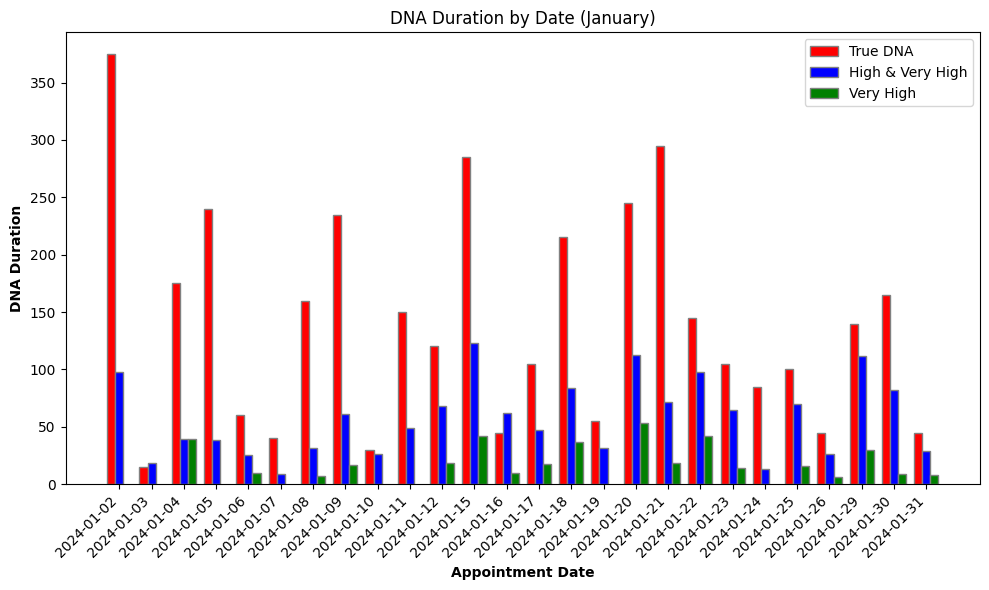

In [36]:
# Filter and group the data
true_dna_grouped = true_dna[true_dna["appt_month_trans"] == 1].groupby("appt_date")["appt_duration"].sum().reset_index()
historic_high_very_high_grouped2 = historic_high_very_high[historic_high_very_high["appt_month_trans"] == 1].groupby("appt_date")["proportion_duration"].sum().reset_index()
historic_very_high_grouped2 = historic_very_high[historic_very_high["appt_month_trans"] == 1].groupby("appt_date")["proportion_duration"].sum().reset_index()

# Merge the data into a single DataFrame
scenario2_df = pd.merge(true_dna_grouped, historic_high_very_high_grouped2, on='appt_date', how='outer')
scenario2_df = pd.merge(scenario2_df, historic_very_high_grouped2, on='appt_date', how='outer')
scenario2_df.rename(columns={'appt_duration': 'appt_duration_true_dna'}, inplace=True)
scenario2_df.rename(columns={'proportion_duration_x': 'proportion_duration_high_very_high'}, inplace=True)
scenario2_df.rename(columns={'proportion_duration_y': 'proportion_duration_very_high'}, inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Set positions of the bars
r1 = range(len(scenario2_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.bar(r1, scenario2_df['appt_duration_true_dna'], color='red', width=bar_width, edgecolor='grey', label='True DNA')
plt.bar(r2, scenario2_df['proportion_duration_high_very_high'], color='blue', width=bar_width, edgecolor='grey', label='High & Very High')
plt.bar(r3, scenario2_df['proportion_duration_very_high'], color='green', width=bar_width, edgecolor='grey', label='Very High')

# Add labels and title
plt.xlabel('Appointment Date', fontweight='bold')
plt.ylabel('DNA Duration', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(scenario2_df))], scenario2_df['appt_date'])
plt.title('DNA Duration by Date (January)')

# Add legend
plt.legend()

# Adjust x-axis date labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Compare estimated DNA to true DNA time using MAE, MSE, and RMSE
scenario2_df["error"] = scenario2_df["appt_duration_true_dna"] - scenario2_df["proportion_duration_very_high"]

# Compute Mean Absolute Error (MAE)
mae_scenario2 = scenario2_df["error"].abs().mean()

# Compute Mean Squared Error (MSE)
mse_scenario2 = (scenario2_df["error"] ** 2).mean()

# Compute Root Mean Squared Error (RMSE)
rmse_scenario2 = np.sqrt(mse_scenario2)

### Future data

In [54]:
# Import future ENT appointments data
future = pd.read_csv("../future_appts_trans_ENT.csv")

In [55]:
# Transform date from object to datetime
future["appt_date"] = pd.to_datetime(future["appt_date"])
future

,appointment_id,age_deid,bmi_deid,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,substance_misuse,...,appt_date,ethnicity_trans,tfc_name_trans,patient_on_multiple_pathways_trans,appt_month_trans,hospital_service_display_trans,service_mapping_trans,reason_display_trans,appointment_type_trans,did_not_attend_risk_group_trans
0,17479744,57,27.45,1,0,1,1,0,0,0,...,2024-06-26,3,7,0,6,0,10,1,0,3
1,17631073,17,27.45,0,1,0,2,0,0,0,...,2024-05-07,3,7,0,5,0,10,1,0,3
2,17659262,27,21.70,0,0,0,4,0,0,0,...,2024-05-07,5,7,0,5,0,10,2,0,2
3,17659348,57,21.70,0,0,0,3,0,0,0,...,2024-05-07,5,7,0,5,0,10,2,0,3
4,17659361,27,27.45,0,1,0,2,0,0,0,...,2024-05-07,3,7,0,5,0,10,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,20183628,47,27.45,0,0,1,2,0,0,0,...,2024-06-19,5,7,0,6,0,10,1,0,1
2561,20183649,57,40.00,0,1,0,1,0,0,0,...,2024-06-08,3,7,0,5,0,10,2,0,3
2562,20183782,32,21.70,0,0,0,4,0,0,0,...,2024-05-25,3,7,0,7,0,10,6,0,1
2563,20183795,62,39.45,0,0,0,1,0,0,0,...,2024-06-17,3,7,0,6,0,10,3,0,1


In [56]:
# Count unique in appointment_type
future["appointment_type"].value_counts()

appointment_type
Face to face    2565
Name: count, dtype: int64

In [57]:
# Count # of new vs f/up appointments
future["new_appt_flag"].value_counts()

new_appt_flag
1    2256
0     309
Name: count, dtype: int64

In [58]:
# Count # of different reason_displays
future["reason_display"].value_counts()

reason_display
Adult ENT New                     2201
Adult ENT F/Up                     247
Adult ENT Results F/Up              50
Adult ENT Voice Clinic New          22
Adult ENT Balance New               13
Adult ENT Thyroid New               12
Adult ENT Nurse Skin Test New        7
Adult ENT Voice Clinic F/Up          4
Adult ENT Thyroid F/Up               3
Adult ENT Pre-Assessment F/Up        2
Adult ENT Voice Osteopath F/Up       2
Adult ENT Post Op F/Up               1
Adult ENT Voice Osteopath New        1
Name: count, dtype: int64

In [59]:
# Group reason displays to consultants, nurses, and others

# Define the function to categorise the clinics
def group_reason_display(reason_display):
    surgeon_clinics = ["Adult ENT New", 
                       "Adult ENT F/Up", 
                       "Adult ENT Results F/Up", 
                       "Adult ENT Thyroid New", 
                       "Adult ENT Thyroid F/Up",
                       "Adult ENT Post Op F/Up"]
    if any(keyword in reason_display for keyword in surgeon_clinics):
        return "Surgeon"
    elif "Nurse" in reason_display:
        return "Nurse"
    else:
        return "Other"

# Apply the function to the reason_display column
future["reason_display_grouped"] = future["reason_display"].apply(group_reason_display)

# Count the grouped reason displays
future["reason_display_grouped"].value_counts()

reason_display_grouped
Surgeon    2514
Other        44
Nurse         7
Name: count, dtype: int64

In [60]:
# Total appointment duration per day for surgeon clinics
future[future["reason_display_grouped"] == "Surgeon"].groupby("appt_date")["appt_duration"].sum().reset_index()

,appt_date,appt_duration
0,2024-05-01,175.0
1,2024-05-02,255.0
2,2024-05-03,270.0
3,2024-05-07,325.0
4,2024-05-08,135.0
...,...,...
323,2025-10-27,20.0
324,2025-11-03,15.0
325,2025-12-01,15.0
326,2025-12-22,10.0


In [61]:
# Filter for very high risk group
very_high = future[future["did_not_attend_risk_group_trans"] == 4]

In [64]:
# Estimate future DNA time for very high risk group: surgeon & new appointments only

# Create a new df
very_high_surgeon_new = very_high[(very_high["reason_display_grouped"] == "Surgeon") & (very_high["new_appt_flag"] == 1)]

# Sum up appointment duration per day
dna_very_high_surgeon_new = very_high_surgeon_new.groupby("appt_date")["appt_duration"].sum().reset_index()

dna_very_high_surgeon_new

,appt_date,appt_duration
0,2024-05-02,15.0
1,2024-05-08,15.0
2,2024-05-09,15.0
3,2024-05-10,15.0
4,2024-05-14,30.0
...,...,...
151,2025-07-31,15.0
152,2025-08-11,20.0
153,2025-08-19,15.0
154,2025-09-15,15.0


In [63]:
# Number of very high risk appointments per day
dna_very_high_surgeon_new["appt_count"] = dna_very_high_surgeon_new.groupby("appt_date")["appt_duration"].count().reset_index()["appt_duration"]

dna_very_high_surgeon_new

,appt_date,appt_duration,appt_count
0,2024-05-02,15.0,1
1,2024-05-08,15.0,1
2,2024-05-09,15.0,1
3,2024-05-10,15.0,1
4,2024-05-14,30.0,1
...,...,...,...
151,2025-07-31,15.0,1
152,2025-08-11,20.0,1
153,2025-08-19,15.0,1
154,2025-09-15,15.0,1
